### Implementing MDP

First, make sure you understand the underlying MDP of a Gridworld.
  -  Implement a GridWorld Class
  - 
  -  Implement all key features defining an MDP in respectively named methods or attributes of this object
  - 
  - Specify whether your MDP is deterministic or stochastic

    - 
As you have seen in previously researched examples, typically GridWorlds add
some additional complexities for the agent. Some typical examples include Walls
(non-passable tiles), traps (tiles that penalize passing them with some negative
reward), or difficult terrain (typically icy or windy tiles, where agents are passed
onto certain neighboring tiles instead of arriving where they planned to). For
this task you may use the examples above or come up with your own ideas.
  - 
  - Implement at least two complexities for your agent to overcome. You
may use the examples above or come up with your own ideas (or take
inspiration from GridWorlds you found online)

In [80]:
import numpy as np
import random
import math
import random
import numpy as np
import matplotlib.pyplot as plt 
import time


class GridWorld:

    def __init__(self, grid=(6,6),  start = (0,0) , goal=(5,5), wall = [(2,2),(5,2)], mountain = [(3,3), (3,4)] ):

      #state = self.state
      
      # receives a tuple of the grid shape
      self.grid_row, self.grid_col = grid
      print(self.grid_row, self.grid_col)
      #value = self.value
      self.start = start
      print(start)
      self.goal = goal
      self.state = start


                          #right,  left,  up, down  
      self.action = [(1,0),(-1,0),(0,1),(0,-1)]

      self.wall = wall 
      self.mountain = mountain

      # define grid and add agent , goal and obstracles. 
      
      self.grid = np.zeros((self.grid_row, self.grid_col))

     

     # grid matrix
      self.valid_grid = [(x, y) for x in range(self.grid_row) for y in range(self.grid_col)]
      
      print(self.valid_grid)

      # add goal
      self.grid[self.goal[0], self.goal[1]] = 50

      # add wall
      for walls in self.wall:
        print(walls)
        self.grid[walls[0], walls[1]] = -10

      # add mountain
      for mountains in self.mountain:
            self.grid[mountains[0], mountains[1]] = -2

      print("printing grid")
      print(self.grid)


      
    def policy(self,state):
      
      ''' input: takes current state. tuple: (x, y) 
      return: random action to take in a state. tuple: (x , y) '''


      if random.random() < 0.2:
         act = random.choice(self.action) 
         return act

      else: 

         # getting direction of goal state from manhattan distance

         dx = self.goal[0] - self.state[0]
         dy = self.goal[1] - self.state[1]       

         if dx > 0:

           #print('(1,0)   -- > policy')

           return (1,0)  #"right"
         elif dx < 0:
          # print('(-1,0)   -- > policy')
           return (-1,0) # "left"
         elif dy > 0:
        #   print('(0,1)   -- > policy')
           return (0,1) #"up"
         else:
         #  print('(0,-1)   -- > policy')
           return (0,-1) #"down"
      


    def reward_function(self, state):

      '''return an float of the reward/penalty'''

      # to do
        # value/reward  (+1 for each move, +50 for goal state, -2 for heating obstracle, -1 for traps)
     

      if state in self.wall:
        return -2.0

      elif state in self.mountain: 
        return -1.0

      elif state == self.goal:
        return 50.0

      else:
        # this is the discount factor. the cost of taking a step
        return -0.4



    def next_move(self, action, state):

      '''
      checks the move is valid or not and returns updated state
      
      Input: action options, and current state: (x,y)
      output: next_state: (x , y)'''

      curret_state = self.state
      


      new_state_x =  curret_state[0] + action[0]
      new_state_y =  curret_state[1] + action[1]

      new_state = (new_state_x,new_state_y)

     

      # check, how many actions were possible. and account the probabilities randomly

      # validity check
      # if the move exist in teh valid grid world
      if new_state in self.wall:
        #print("this is hitting wall")
        #self.state = curret_state
        return   curret_state

      elif  new_state in self.valid_grid:
        #print("this is a good state")
        self.state = new_state
        return  new_state
        
      else:
        #print("this is invalid state")
        #self.state = curret_state
        return   curret_state





    def reached_goal(self):
      
      # return if the state is a goal state
      return (self.state == self.goal)
        

    
    def reset(self):

      # restart 
      self.state = self.start
      return self.state
      
    

    


    def value_function():
      # compute the values of the reached state reccursively. 

      return None
  


In [122]:
import random
import time

def q_learning(world, n_episodes=1000, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    Calculates the Q-values for all state-action pairs using Q-Learning algorithm
    
    """
    # stores the Q-values for all state-action pairs
    q_values = dict()
    for row in range(world.grid_row):
        for col in range(world.grid_col):
            state = (row, col)
            for action in world.action:
              # first initialize the q_value matrix to zero
                q_values[(state, action)] = 0

    # agent interacts with environment in multiple episodes 
    returns = []
    average_return_per_episode = []
    episode_time= []
    
    # start_time = time.time()
    for episode in range(n_episodes):
        episode_start_time = time.time()

        # get current state
        state = world.state

        # conduct an episode
        # agent interacts with world until reaching end state
        episode_return = 0
        while world.reached_goal() == False:
            # choose action
            # explorartion VS explotation
            if random.uniform(0, 1) < epsilon:
              # explorartion
                action = random.choice(world.action)
            else:
              # explotation
                action = max(world.action, key=lambda a: q_values[(state, a)])

            # take action
            new_state = world.next_move(action, state)

            # receive reward
            reward = world.reward_function(new_state)
            episode_return += reward

            # update Q-value for current state-action pair
            best_next_action = max(world.action, key=lambda a: q_values[(new_state, a)])
            td_target = reward + discount_factor * q_values[(new_state, best_next_action)]
            td_delta = td_target - q_values[(state, action)]
            q_values[(state, action)] += alpha * td_delta

            # move to new state
            state = new_state

        returns.append(episode_return)
        # calculate average return per episode
        average_return_per_episode.append(sum(returns) / len(returns))


        # reset world when episode done
        world.reset()

        # print progress
        if episode % 100 == 0:
            print(f"Episode {episode} completed")

        # calculate time per episode
        episode_time.append(time.time() - episode_start_time)

    # calculate the optimal policy from Q-values
    policy = dict()
    for row in range(world.grid_row):
        for col in range(world.grid_col):
            state = (row, col)
            best_action = max(world.action, key=lambda a: q_values[(state, a)])
            policy[state] = best_action

    

    return q_values, policy, returns, average_return_per_episode, episode_time


# initialize world
world = GridWorld(grid=(6,6), start=(0,0), goal=(5,5), wall=[(2,2),(1,2),(3,2)], mountain=[(3,3),(3,4),(5,0),(4,5),(4,4)])

# evaluate policy
q_values, policy, returns, average_return_per_episode, episode_time = q_learning(world, n_episodes=5000, discount_factor=0.9, alpha=0.7, epsilon=0.9)

# print optimal policy
# for row in range(world.grid_row):
#     for col in range(world.grid_col):
#         state = (row, col)
#         print(policy[state], end="\t")
#     print()

print("\n\n")
print(q_values)

print("\n\n\n\n")


# create a dictionary to map actions to arrow symbols
arrow_symbols = {
    (0, 1): "↑",
    (0, -1): "↓",
    (1, 0): "→",
    (-1, 0): "←"
}

# print optimal policy with arrows
for row in range(world.grid_row):
    for col in range(world.grid_col):
        state = (row, col)
        action = policy[state]
        arrow = arrow_symbols[action]
        print(arrow, end="\t")
    print()

6 6
(0, 0)
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(2, 2)
(1, 2)
(3, 2)
printing grid
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.   0.   0.   0.]
 [  0.   0. -10.   0.   0.   0.]
 [  0.   0. -10.  -2.  -2.   0.]
 [  0.   0.   0.   0.  -2.  -2.]
 [ -2.   0.   0.   0.   0.  50.]]
Episode 0 completed
Episode 100 completed
Episode 200 completed
Episode 300 completed
Episode 400 completed
Episode 500 completed
Episode 600 completed
Episode 700 completed
Episode 800 completed
Episode 900 completed
Episode 1000 completed
Episode 1100 completed
Episode 1200 completed
Episode 1300 completed
Episode 1400 completed
Episode 1500 completed
Episode 1600 completed
Episode 1700 completed
Episode 1800 completed
Episode 1900 completed
Episode 2000 compl

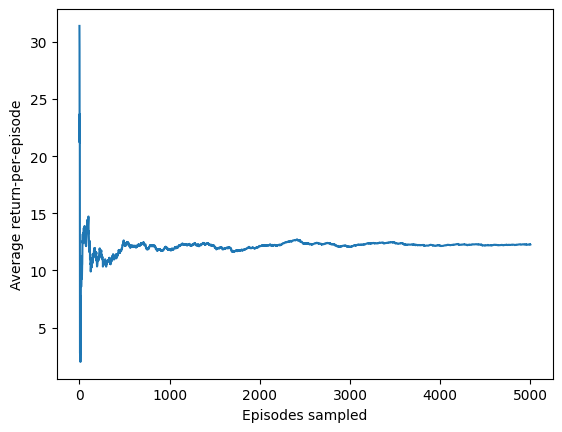

In [123]:



y = average_return_per_episode
x = list(range(5000+1)[1:])

# print(y)

# plot results
plt.plot(x,y)
plt.xlabel("Episodes sampled")
plt.ylabel("Average return-per-episode")
plt.show()

# print(f"Average Return-per-Episode: {np.mean( returns)}")
# print(f"Wallclock-Time: {end_time - start_time} seconds")


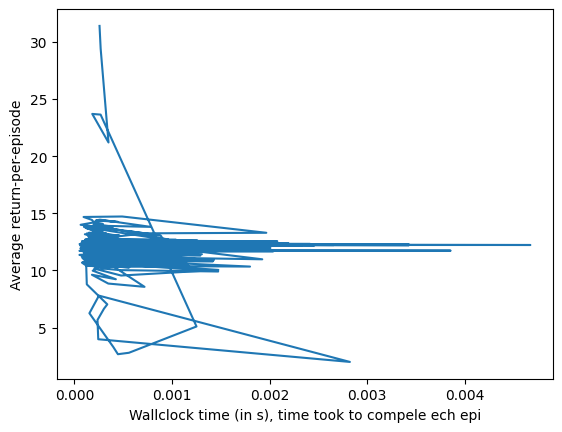

In [124]:

y = average_return_per_episode
x = episode_time
# print(x)
# print(y)

#visualize average return-per-episode in wallclock time

plt.plot(x,y)
plt.xlabel('Wallclock time (in s), time took to compele ech epi')
plt.ylabel('Average return-per-episode')
plt.show()